In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
data = pd.read_csv('/Users/anjujoy/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi'] = 300

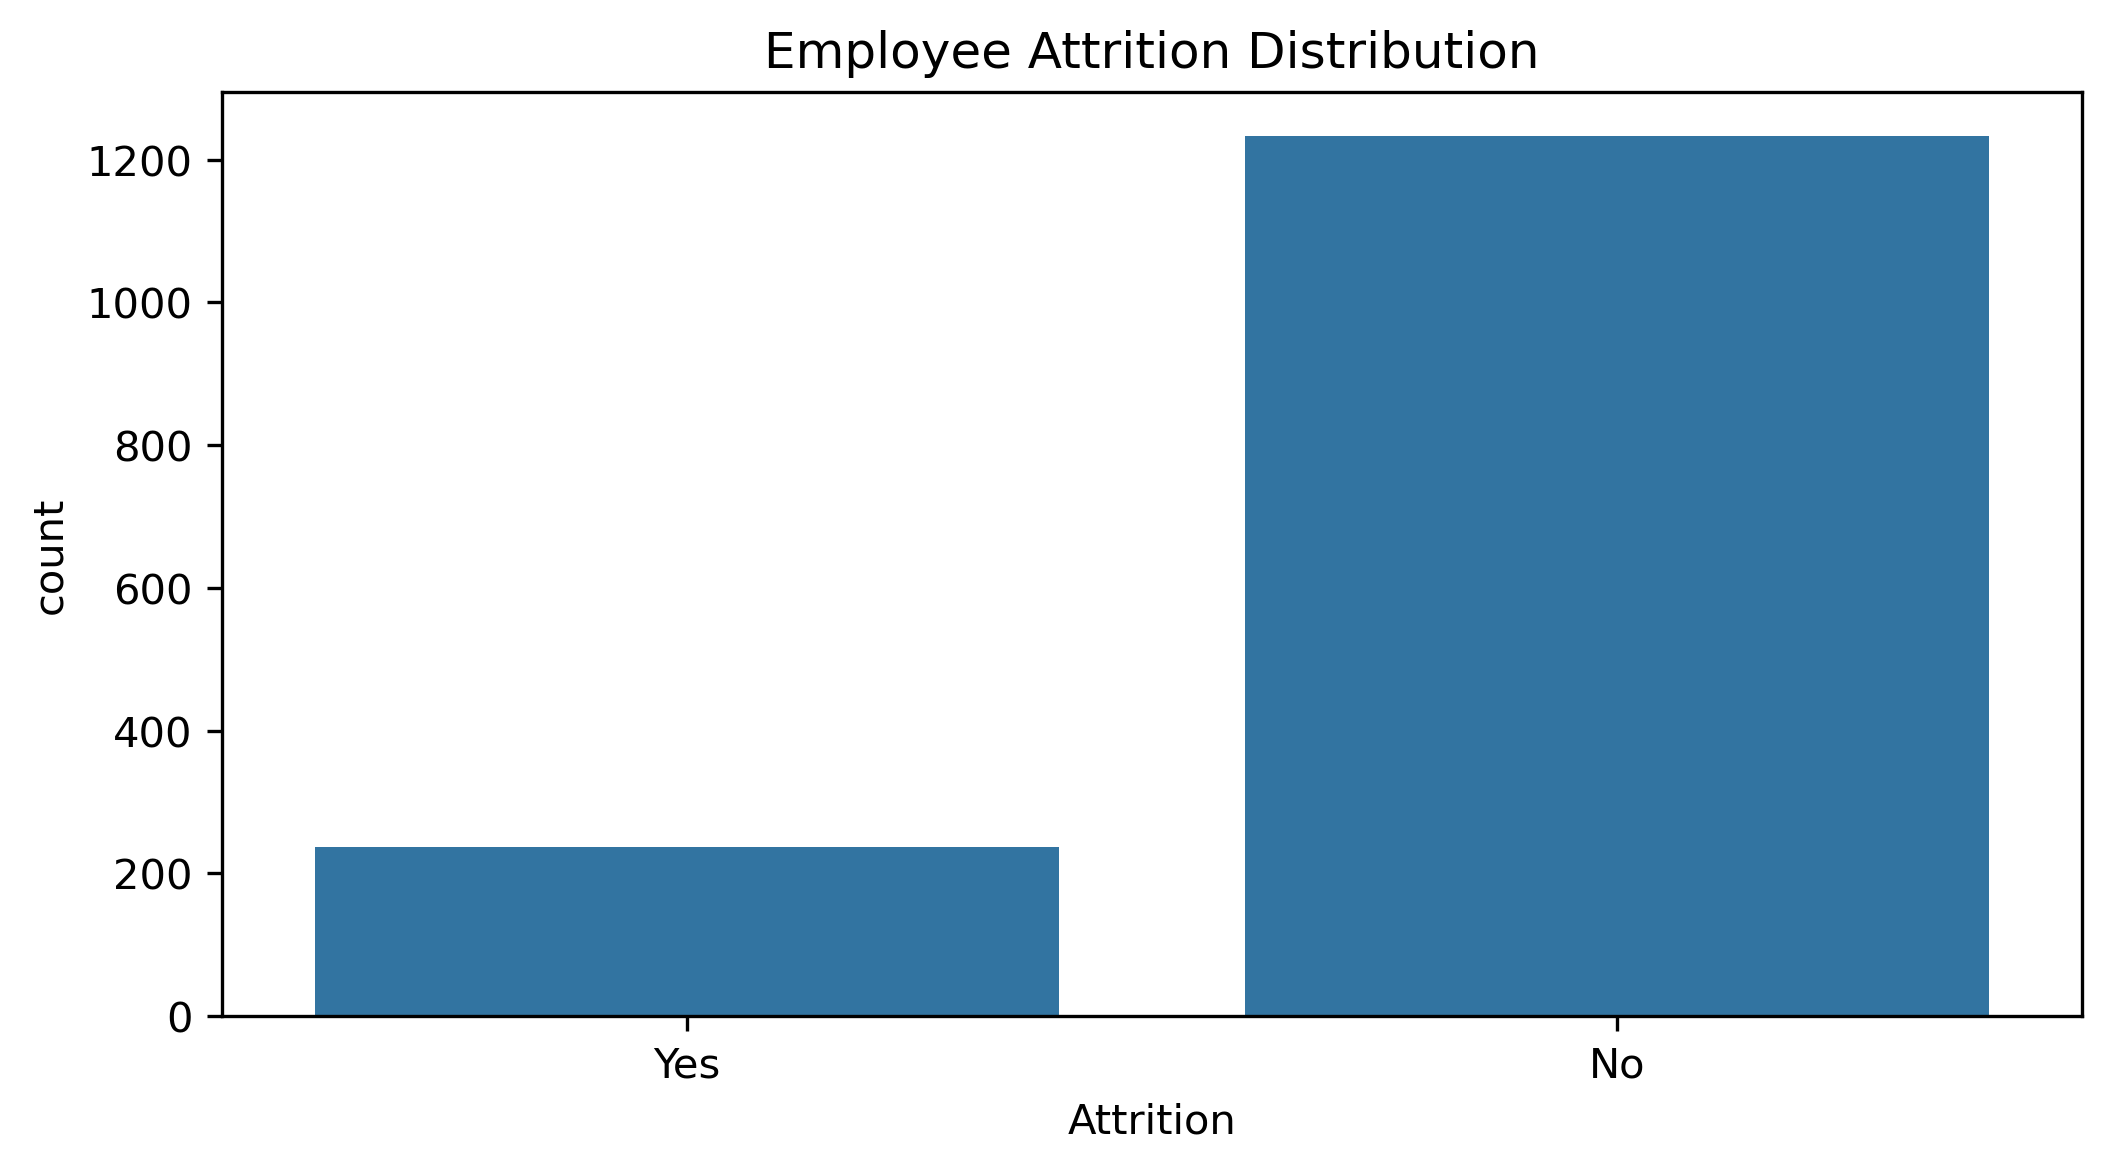

In [11]:
sns.countplot(x='Attrition',data=data)
plt.title('Employee Attrition Distribution')
plt.show()

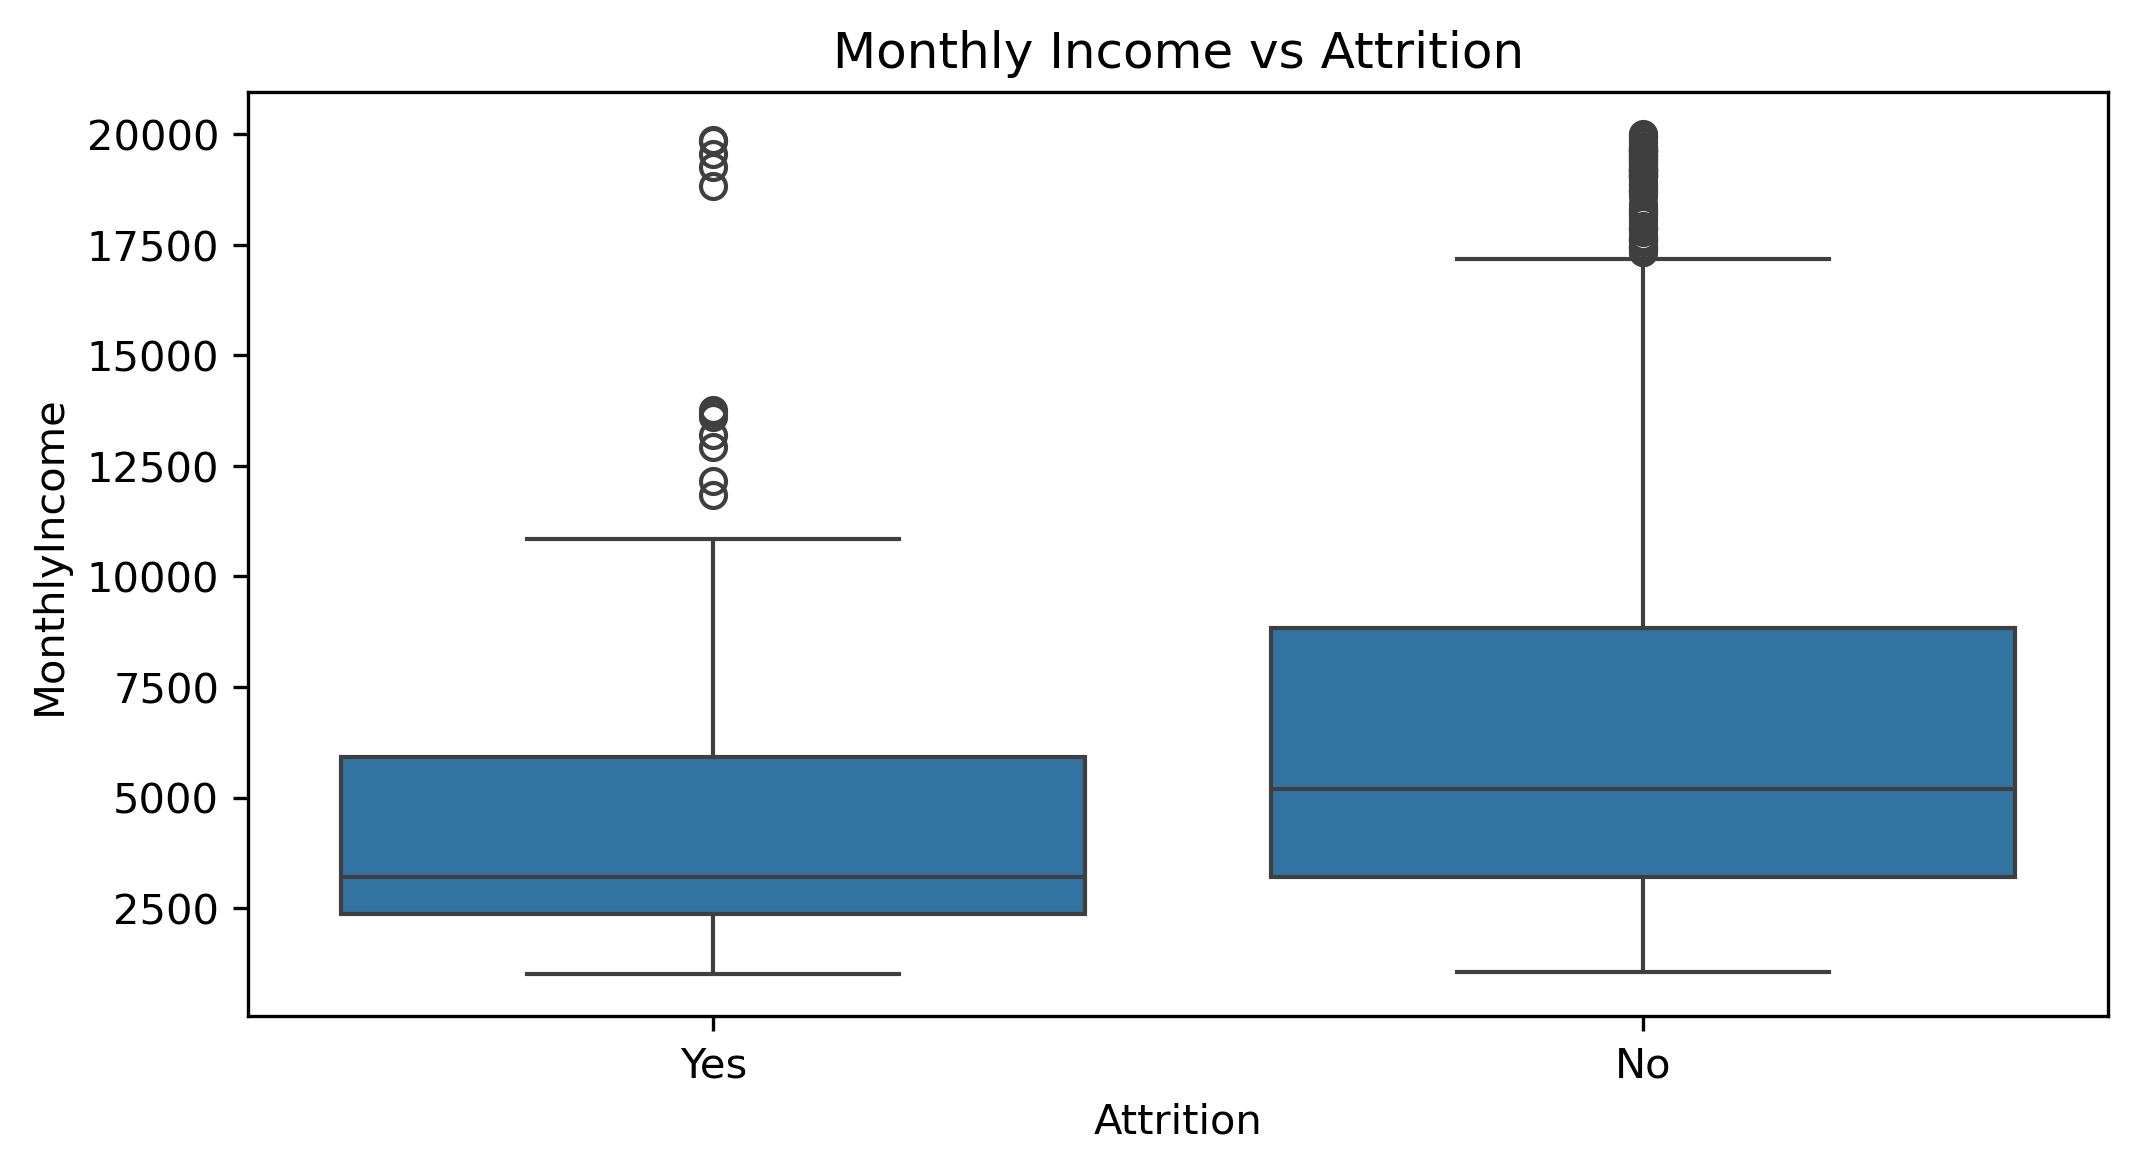

In [12]:
sns.boxplot(x='Attrition',y='MonthlyIncome',data=data)
plt.title('Monthly Income vs Attrition')
plt.show()

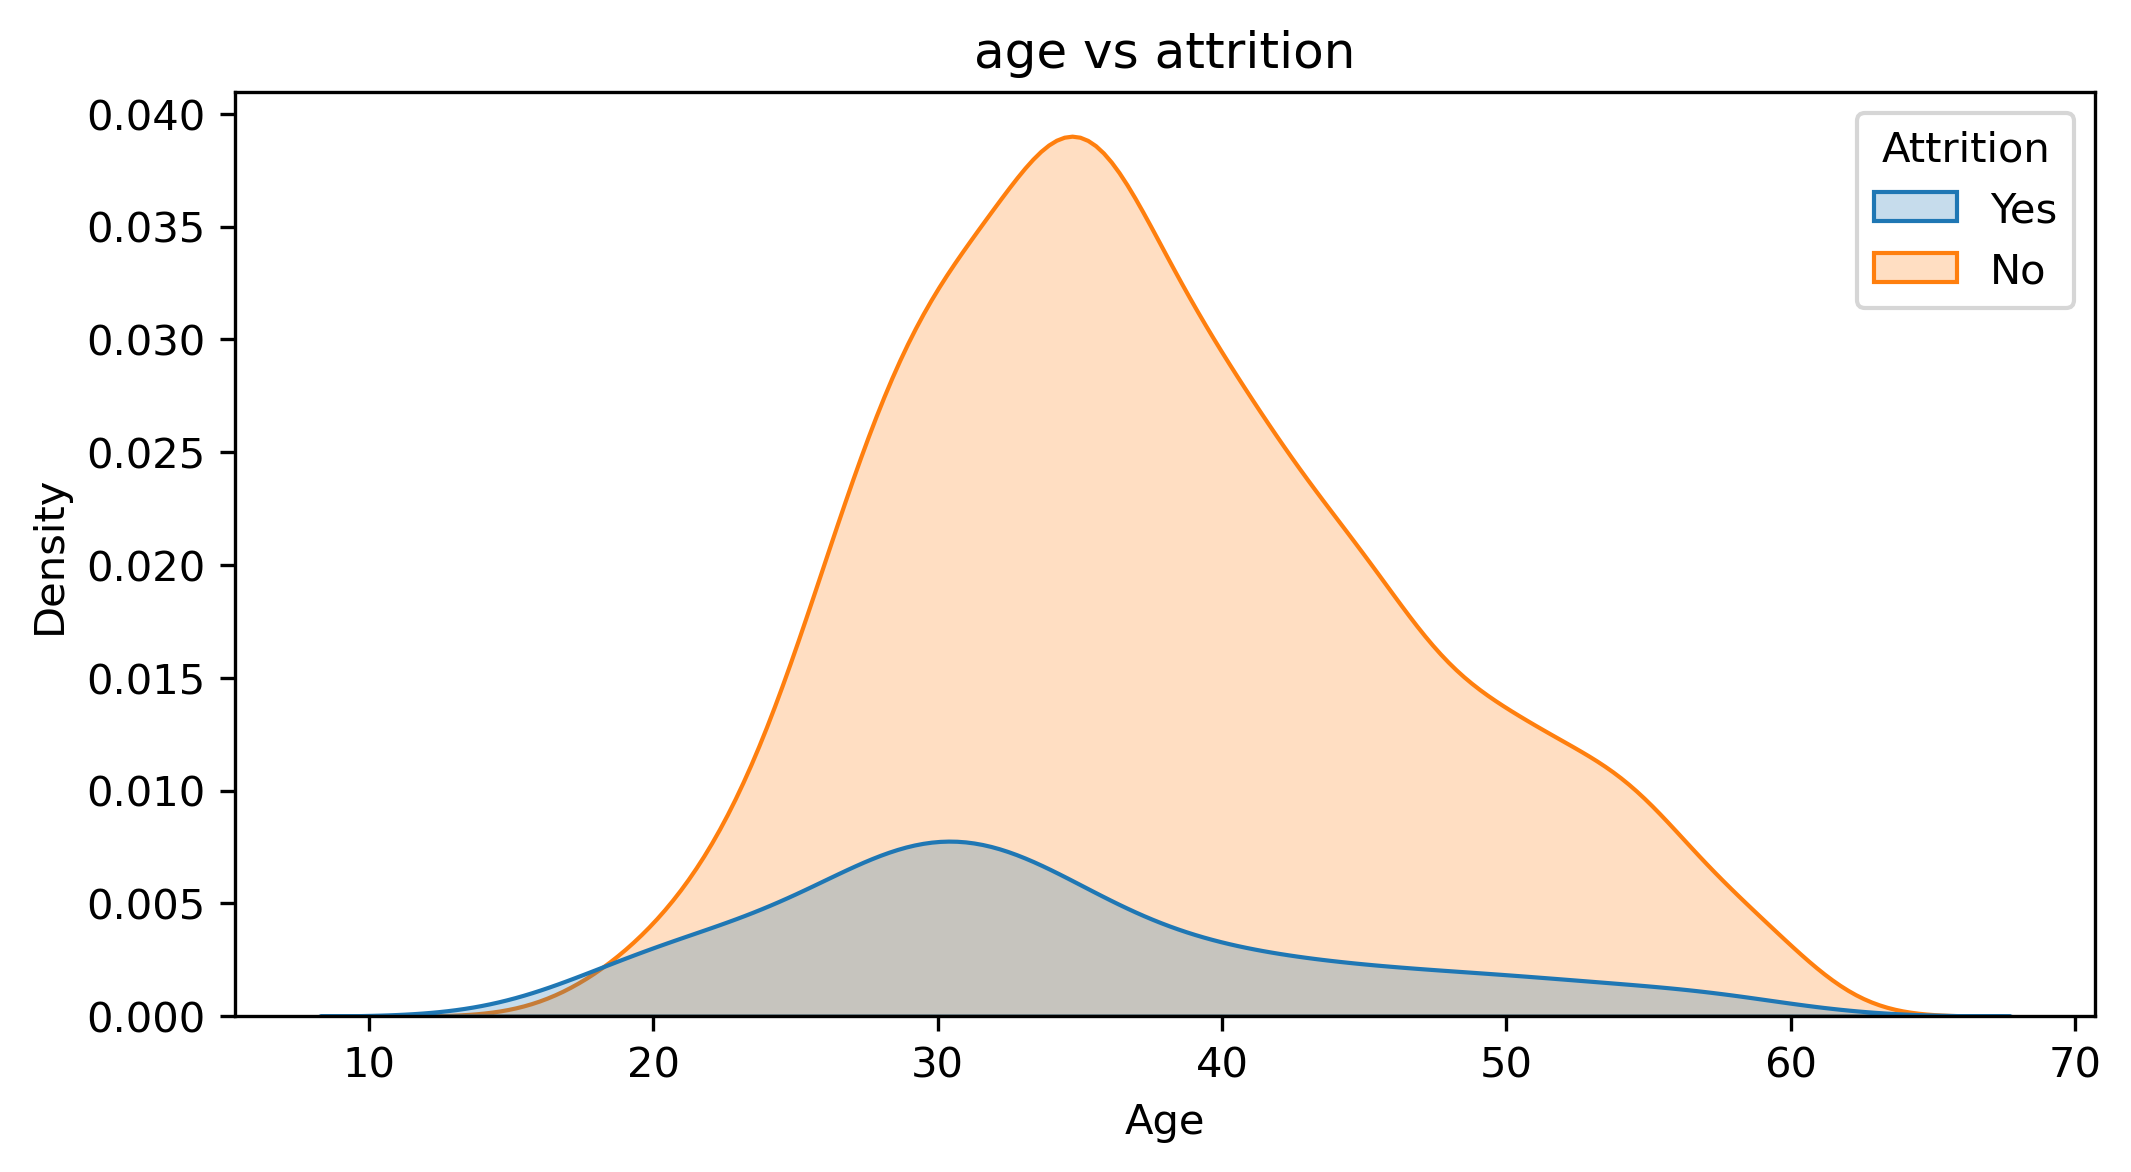

In [13]:
sns.kdeplot(data=data,x='Age',hue='Attrition',fill=True)
plt.title('age vs attrition')
plt.show()

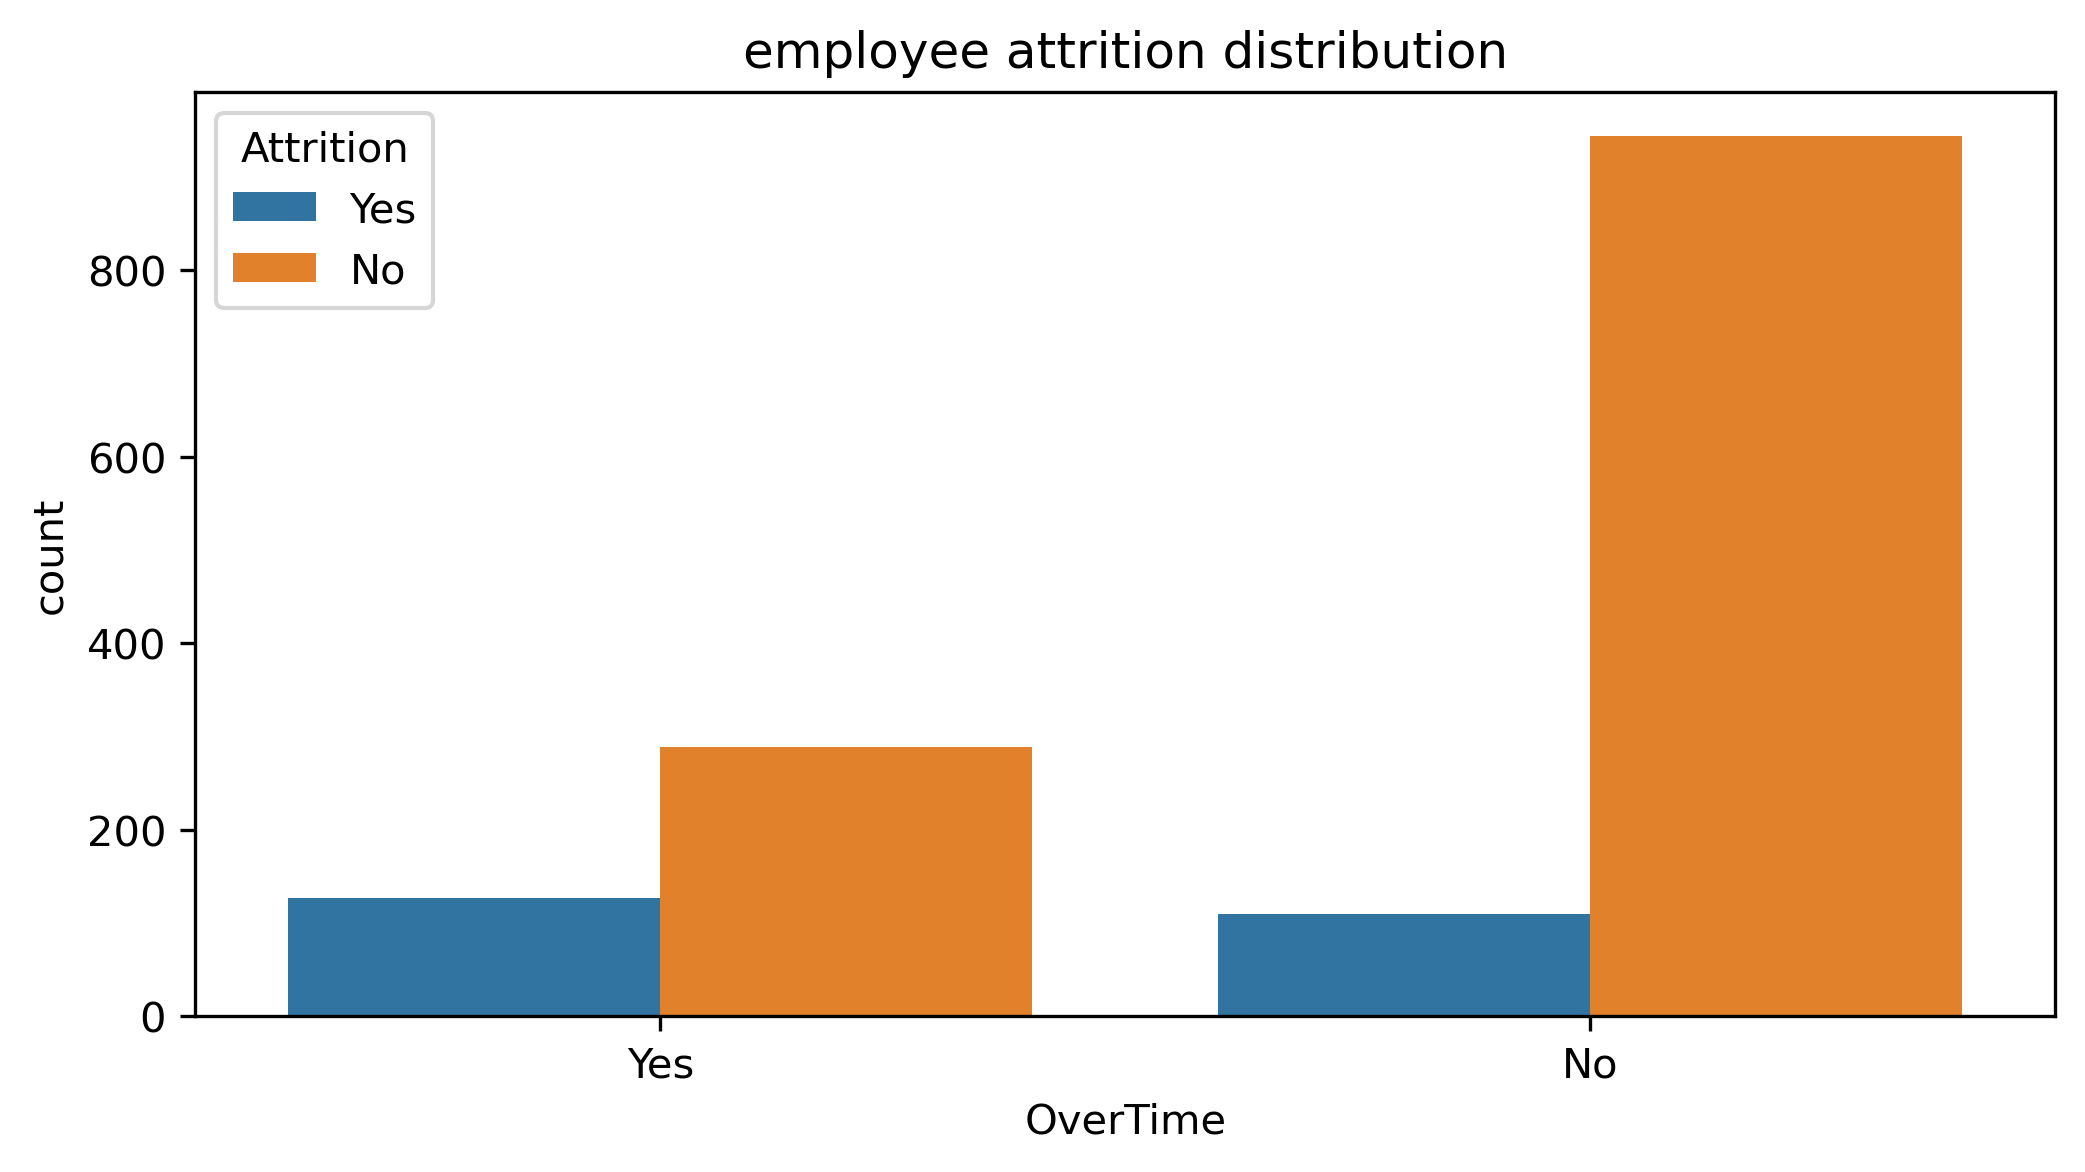

In [14]:
sns.countplot(x='OverTime',hue='Attrition',data=data)
plt.title('employee attrition distribution')
plt.show()

In [15]:
data['Attrition']=data['Attrition'].map({'Yes':1,'No':0})

In [16]:
ordinal_cols=['Education','EnvironmentSatisfaction','WorkLifeBalance','RelationshipSatisfaction','PerformanceRating','JobSatisfaction'
             ,'JobInvolvement']

In [17]:
data[ordinal_cols]=data[ordinal_cols].astype('category')

In [18]:
x=pd.get_dummies(data.drop('Attrition',axis=1),drop_first=True)
y=data['Attrition']

In [19]:
x

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,...,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,PerformanceRating_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1102,1,1,1,94,2,5993,19479,8,...,False,True,True,False,False,False,False,False,False,False
1,49,279,8,1,2,61,2,5130,24907,1,...,True,False,False,True,False,False,True,False,True,False
2,37,1373,2,1,4,92,1,2090,2396,6,...,False,True,True,False,True,False,False,False,True,False
3,33,1392,3,1,5,56,1,2909,23159,1,...,True,False,True,False,False,True,False,False,True,False
4,27,591,2,1,7,40,1,3468,16632,9,...,True,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,1,2061,41,2,2571,12290,4,...,True,False,False,False,False,True,False,False,True,False
1466,39,613,6,1,2062,42,3,9991,21457,4,...,True,False,False,False,False,False,False,False,True,False
1467,27,155,4,1,2064,87,2,6142,5174,1,...,True,False,True,True,True,False,False,False,True,False
1468,49,1023,2,1,2065,63,2,5390,13243,2,...,True,False,False,False,False,False,True,True,False,False


In [20]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 60 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   EmployeeCount                      1470 non-null   int64
 4   EmployeeNumber                     1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobLevel                           1470 non-null   int64
 7   MonthlyIncome                      1470 non-null   int64
 8   MonthlyRate                        1470 non-null   int64
 9   NumCompaniesWorked                 1470 non-null   int64
 10  PercentSalaryHike                  1470 non-null   int64
 11  StandardHours                      1470 non-null   int64
 12  StockOptionLevel    

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42,stratify=y)

In [22]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)

In [23]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [24]:
y_predict = model.predict(x_test_scaled)

In [25]:
model.score(x_test_scaled, y_test)

0.8662131519274376

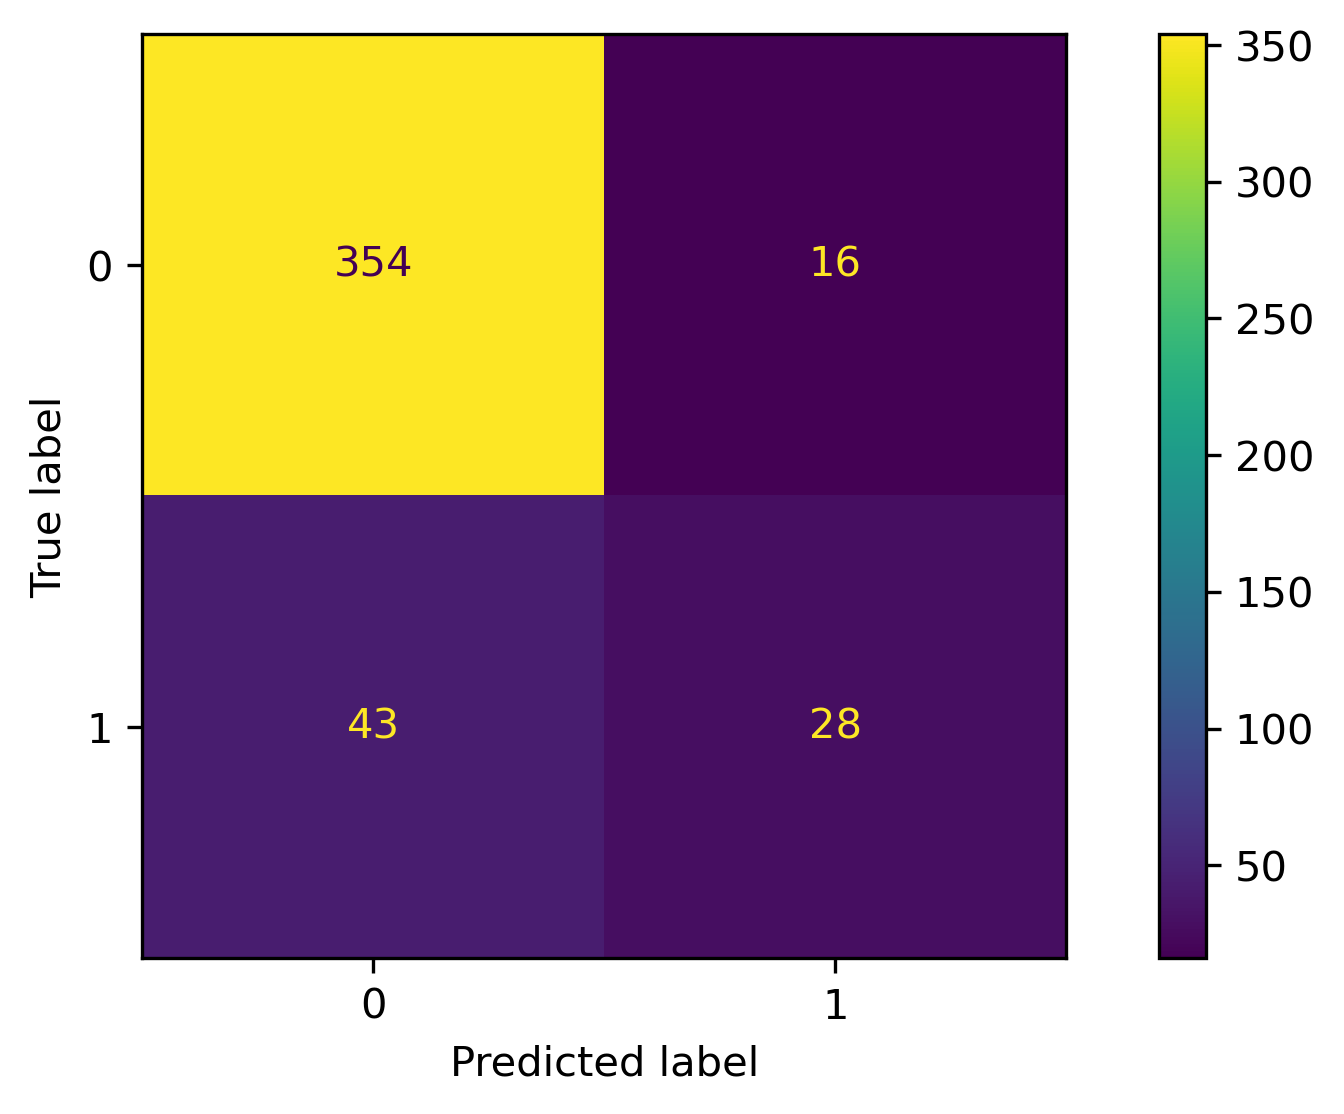

In [26]:
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [27]:
from sklearn.feature_selection import RFE
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42,stratify=y)

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)

model = LogisticRegression(
    max_iter=5000,
    solver="lbfgs"
)

rfe = RFE(
    estimator=model,
    n_features_to_select=5,
    verbose=1
)

rfe.fit(x_train_scaled, y_train)

Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 fe

,estimator,LogisticRegre...max_iter=5000)
,n_features_to_select,5
,step,1
,verbose,1
,importance_getter,'auto'
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1


In [29]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False])

In [30]:
selected_col = X_train.columns[rfe.support_]
selected_col

Index(['StockOptionLevel', 'TotalWorkingYears', 'JobInvolvement_2',
       'JobInvolvement_3', 'OverTime_Yes'],
      dtype='object')

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Split once
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

# Scale once
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def find_best_feature(n):
    model = LogisticRegression(max_iter=5000)

    rfe = RFE(
        estimator=model,
        n_features_to_select=n,
        verbose=0
    )

    rfe.fit(X_train_scaled, y_train)

    selected_cols = X_train.columns[rfe.support_]

    model.fit(X_train_scaled[:, rfe.support_], y_train)
    score = model.score(X_test_scaled[:, rfe.support_], y_test)

    print("Selected columns:", list(selected_cols))
    print(f"{n} features → accuracy: {score:.4f}")
    print("-" * 30)

for i in range(1, x.shape[1]):
    find_best_feature(i)


Selected columns: ['TotalWorkingYears']
1 features → accuracy: 0.8617
------------------------------
Selected columns: ['TotalWorkingYears', 'OverTime_Yes']
2 features → accuracy: 0.8685
------------------------------
Selected columns: ['TotalWorkingYears', 'MaritalStatus_Single', 'OverTime_Yes']
3 features → accuracy: 0.8617
------------------------------
Selected columns: ['TotalWorkingYears', 'YearsInCurrentRole', 'MaritalStatus_Single', 'OverTime_Yes']
4 features → accuracy: 0.8594
------------------------------
Selected columns: ['TotalWorkingYears', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'MaritalStatus_Single', 'OverTime_Yes']
5 features → accuracy: 0.8571
------------------------------
Selected columns: ['NumCompaniesWorked', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'MaritalStatus_Single', 'OverTime_Yes']
6 features → accuracy: 0.8435
------------------------------
Selected columns: ['NumCompaniesWorked', 'TotalWorkingYears', 'YearsInCurren

In [32]:
selected_cols = [
    'Age', 'DistanceFromHome', 'JobLevel', 'NumCompaniesWorked',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion',
    'YearsWithCurrManager',
    'BusinessTravel_Travel_Frequently',
    'BusinessTravel_Travel_Rarely',
    'Department_Sales',
    'Education_3',
    'EducationField_Life Sciences',
    'EducationField_Marketing',
    'EducationField_Medical',
    'EducationField_Other',
    'EnvironmentSatisfaction_2',
    'EnvironmentSatisfaction_3',
    'EnvironmentSatisfaction_4',
    'Gender_Male',
    'JobInvolvement_2',
    'JobInvolvement_3',
    'JobInvolvement_4',
    'JobRole_Human Resources',
    'JobRole_Laboratory Technician',
    'JobRole_Manufacturing Director',
    'JobRole_Research Director',
    'JobRole_Research Scientist',
    'JobRole_Sales Executive',
    'JobRole_Sales Representative',
    'JobSatisfaction_2',
    'JobSatisfaction_3',
    'JobSatisfaction_4',
    'MaritalStatus_Married',
    'MaritalStatus_Single',
    'OverTime_Yes',
    'RelationshipSatisfaction_2',
    'RelationshipSatisfaction_3',
    'RelationshipSatisfaction_4',
    'WorkLifeBalance_2',
    'WorkLifeBalance_3',
    'WorkLifeBalance_4'
]


In [33]:


X = x[selected_cols]
y = y

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=5000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8798185941043084


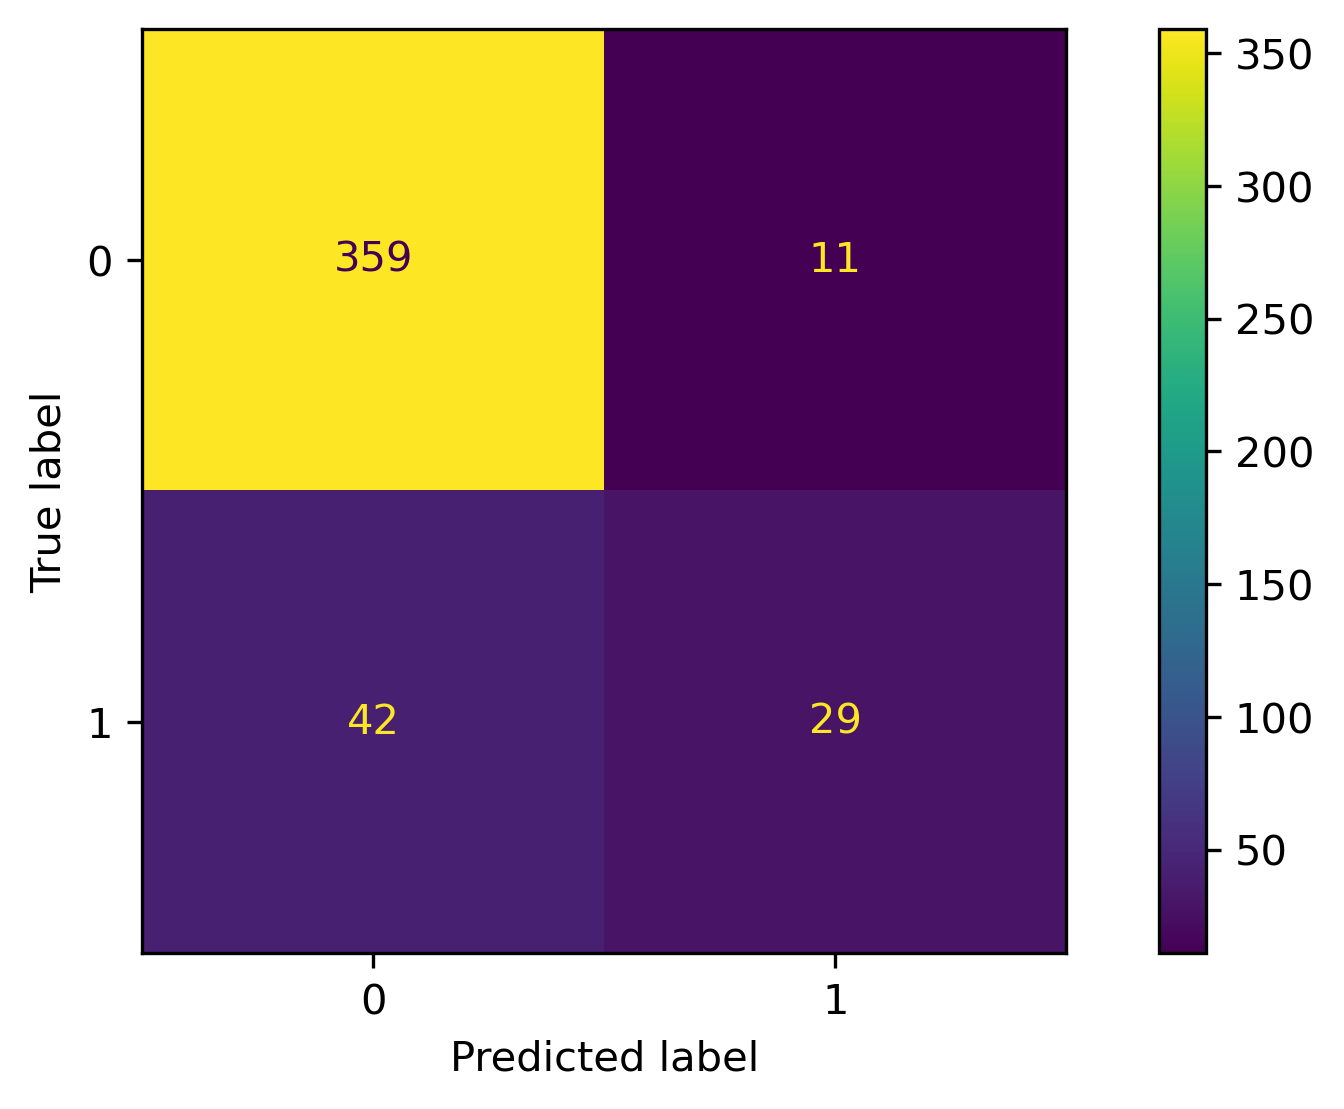

In [34]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [36]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


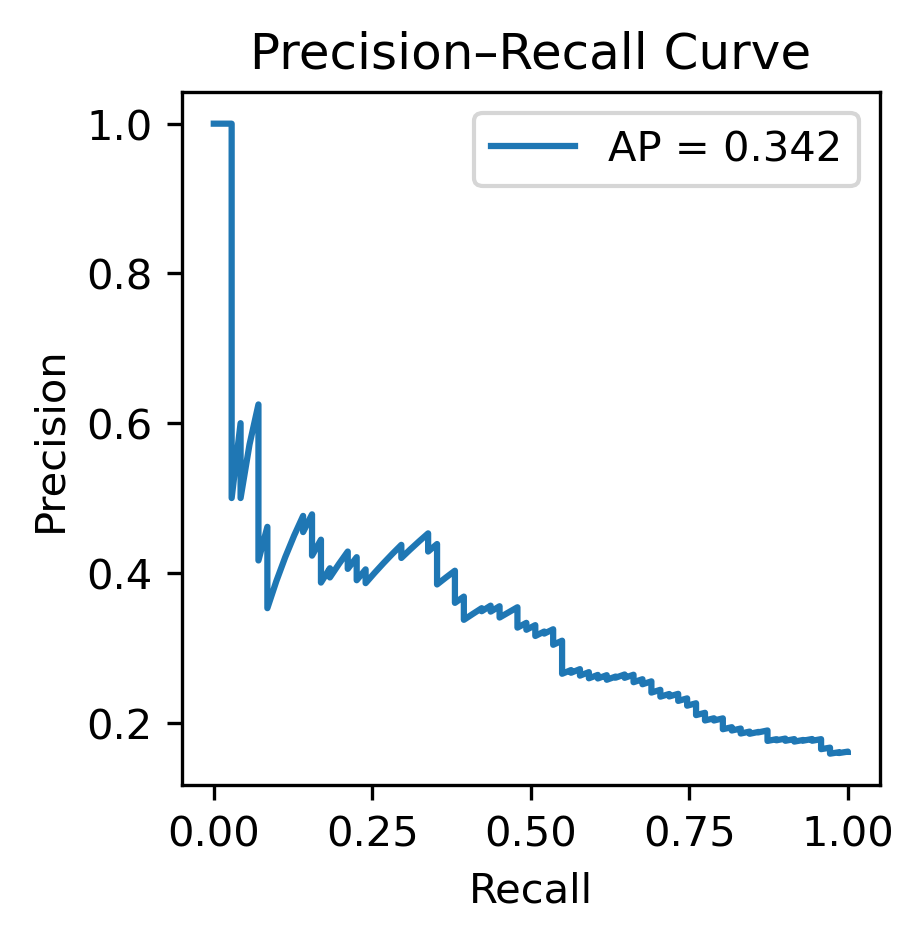

In [42]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure(figsize=(3,3))
plt.plot(recall, precision, label=f"AP = {ap:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend()
plt.show()


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


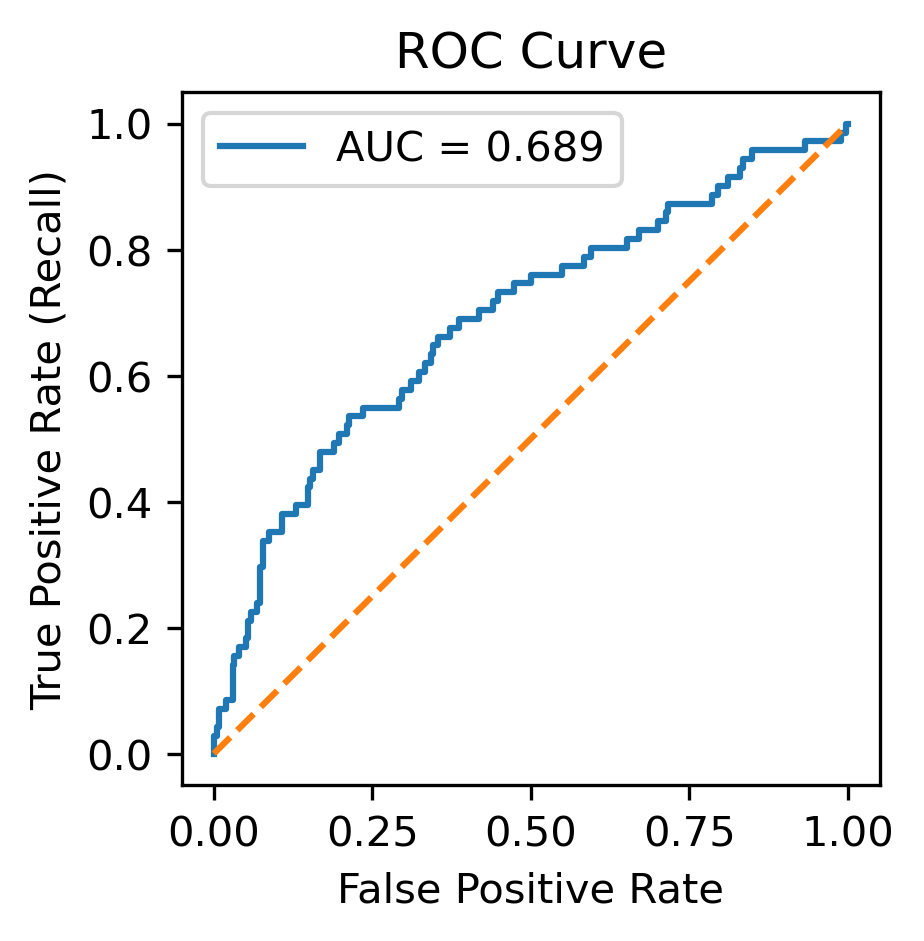

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(3,3))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")  # random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()
